In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek

In [2]:
diabetes = pd.read_csv('diabetes_prediction_dataset.csv', delimiter = ',',encoding = 'utf-8', header = 0)

In [3]:
diabetes['gender'] = diabetes['gender'].replace({'Male': 0, 'Female': 1})
diabetes = diabetes[diabetes['gender'] != 'Other']

In [4]:
unique_values = diabetes['gender'].unique()
print(unique_values)

[1 0]


In [5]:
diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,never,25.19,6.6,140,0
1,1,54.0,0,0,No Info,27.32,6.6,80,0
2,0,28.0,0,0,never,27.32,5.7,158,0
3,1,36.0,0,0,current,23.45,5.0,155,0
4,0,76.0,1,1,current,20.14,4.8,155,0


In [6]:
diabetes = diabetes[diabetes['smoking_history'] != 'No Info']

In [7]:
# Create dummy variables for the 'Smoking' column
smoking_dummies = pd.get_dummies(diabetes['smoking_history'], prefix='smoking')

# Merge the dummy variables with the original DataFrame
diabetes = pd.concat([diabetes, smoking_dummies], axis=1)

# Drop the original 'Smoking' column, as it is no longer needed
diabetes = diabetes.drop('smoking_history', axis=1)

In [8]:
diabetes = diabetes[diabetes['age'] > 3.0]

In [11]:
unique_values = diabetes['age'].unique()
print(unique_values)

[80. 28. 36. 76. 20. 44. 42. 32. 53. 54. 78. 67. 15. 37. 40. 69. 72. 30.
 45. 43. 41. 26. 50. 34. 73. 77. 29. 60. 38. 57. 19. 21. 59. 27. 56. 79.
 74. 55. 62. 47. 66. 68.  5. 75. 22. 58. 24. 18. 33. 16. 46. 61. 31. 49.
 25. 39. 65. 14. 70. 48. 11. 51. 17.  9. 64. 63. 52. 35. 71.  4.  6. 23.
 10. 13. 12.  7.  8.]


In [12]:
diabetes.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_current,smoking_ever,smoking_former,smoking_never,smoking_not current
0,1,80.0,0,1,25.19,6.6,140,0,0,0,0,1,0
2,0,28.0,0,0,27.32,5.7,158,0,0,0,0,1,0
3,1,36.0,0,0,23.45,5.0,155,0,1,0,0,0,0
4,0,76.0,1,1,20.14,4.8,155,0,1,0,0,0,0
5,1,20.0,0,0,27.32,6.6,85,0,0,0,0,1,0


In [13]:
X = diabetes[['gender','age','hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']].values
y = diabetes['diabetes'].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
smt = SMOTETomek(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smt.fit_resample(X_train, y_train)

In [16]:
model_LR = LogisticRegression(solver='liblinear')
model_LR.fit(X_resampled,y_resampled)

LogisticRegression(solver='liblinear')

In [17]:
# Make predictions
y_resampled_pred = model_LR.predict(X_resampled)
y_test_pred = model_LR.predict(X_test)

In [18]:
# Calculate accuracy
accuracy_resampled = accuracy_score(y_resampled, y_resampled_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

In [19]:
print("The model's accuracy for the train data is: \t", accuracy_resampled)
print("The model's accuracy for the test data is: \t", accuracy_test)

The model's accuracy for the train data is: 	 0.885049663712084
The model's accuracy for the test data is: 	 0.8858712715855573


In [20]:
print(np.bincount(y_resampled))

[44902 44902]


In [21]:
# Confusion Matrix

cf_matrix= confusion_matrix(y_resampled, y_resampled_pred)


<AxesSubplot:>

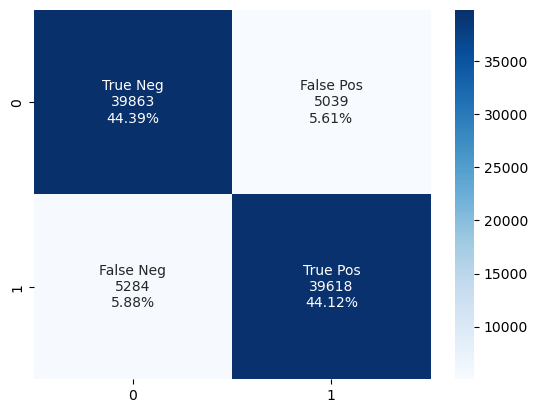

In [22]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

In [23]:
cf_matrix_test= confusion_matrix(y_test, y_test_pred)

<AxesSubplot:>

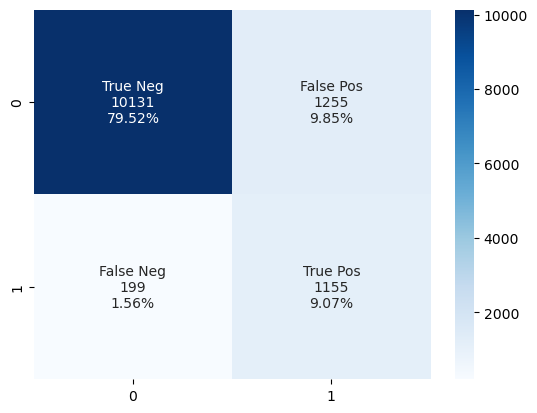

In [24]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_test.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_test.flatten()/np.sum(cf_matrix_test)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_test, annot=labels, fmt="", cmap='Blues')

<AxesSubplot:>

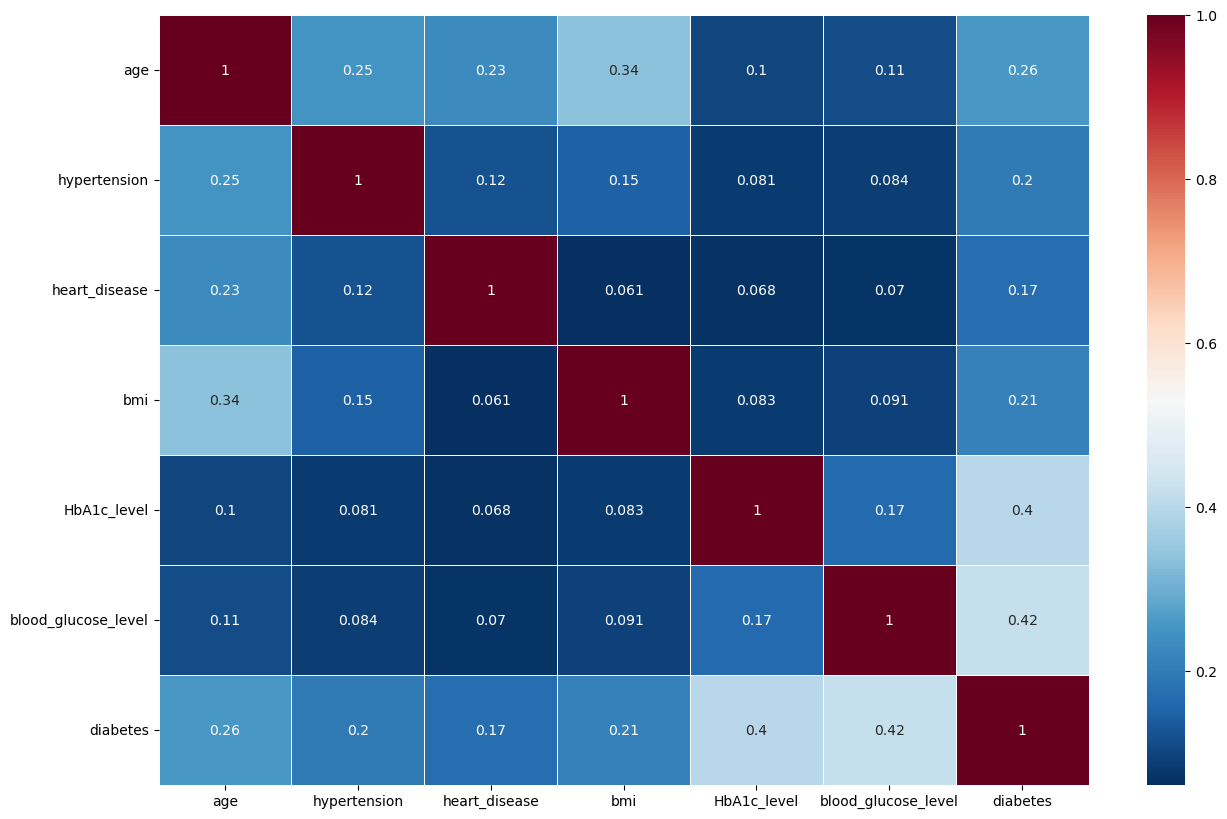

In [61]:
corr = diabetes.corr(method='pearson')
#Pearson - Visual heatmap
fig, ax = plt.subplots(figsize=(15,10)) #for size of figure
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu_r', annot=True, linewidth=0.5, ax=ax)